In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("Images/_41_2530.jpeg")

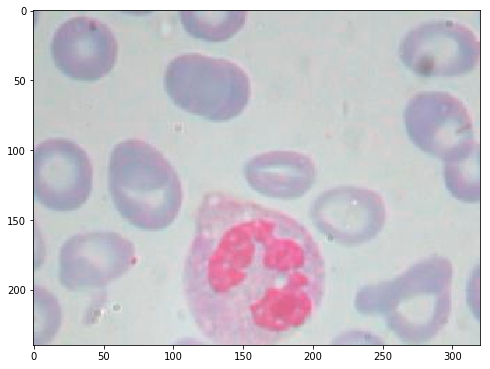

In [3]:
plt.figure(figsize=(8,12))
plt.imshow(img)

In [4]:
#It imports images in BRG so we need to convert it
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

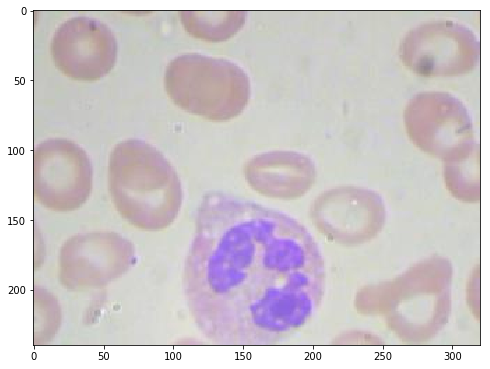

In [5]:
plt.figure(figsize=(8,12))
plt.imshow(img)

In [6]:
resized = cv2.resize(img,(350,250),interpolation=cv2.INTER_AREA)

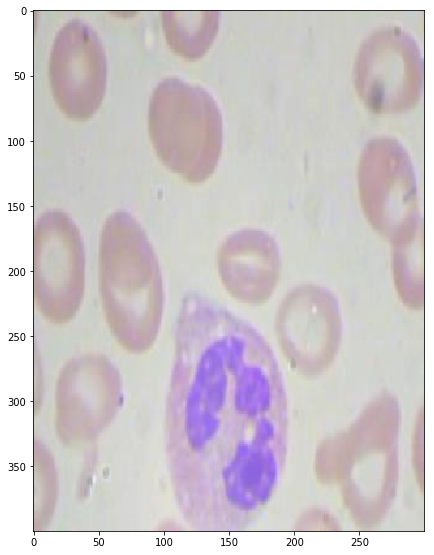

In [7]:
plt.figure(figsize=(7,12))
plt.imshow(resized)

In [8]:
mat = np.ones(resized.shape,np.uint8) * 30

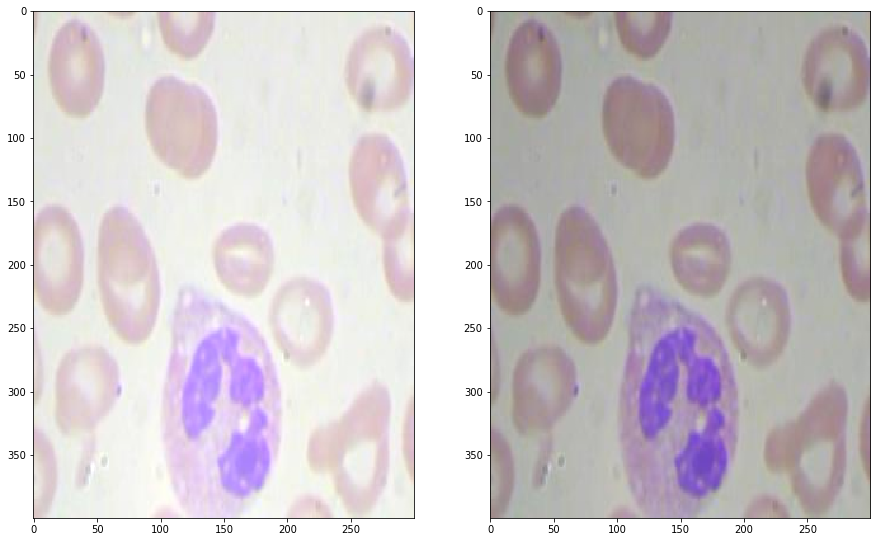

In [9]:
#brightening and darkening

fig=plt.figure(figsize=(15,15))
axes=fig.subplots(1,2)

axes[0].imshow(cv2.add(resized,mat))
axes[1].imshow(cv2.subtract(resized,mat))

resized=cv2.subtract(resized,mat)

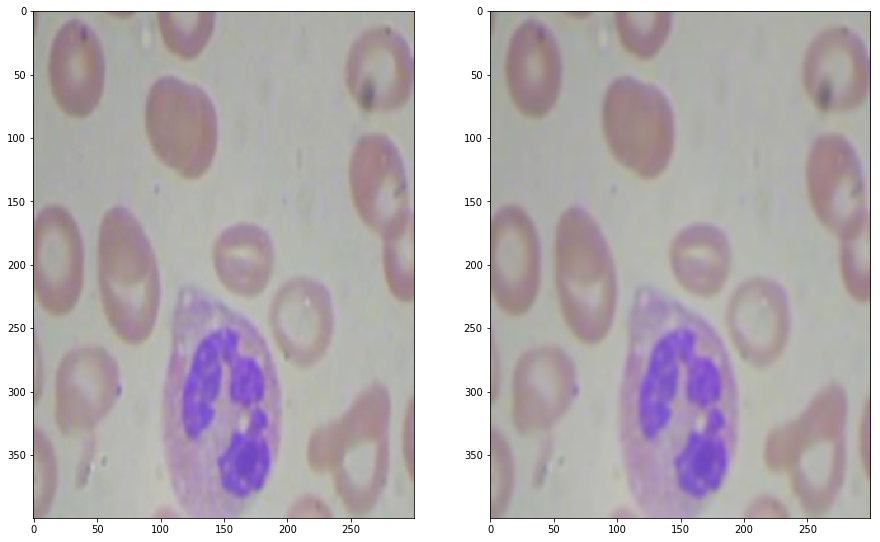

In [10]:
#blurring using filter
blurf1= np.ones((3,3),np.float32) / 9      # Divide by 9 Sum of matrix is 1
blurf2= np.ones((5,5),np.float32) / 25     # Divide by 25 Sum of matrix is 1

blurred1= cv2.filter2D(resized,-1,blurf1)
blurred2= cv2.filter2D(resized,-1,blurf2)

fig=plt.figure(figsize=(15,15))
axes=fig.subplots(1,2)

axes[0].imshow(blurred1)
axes[1].imshow(blurred2)

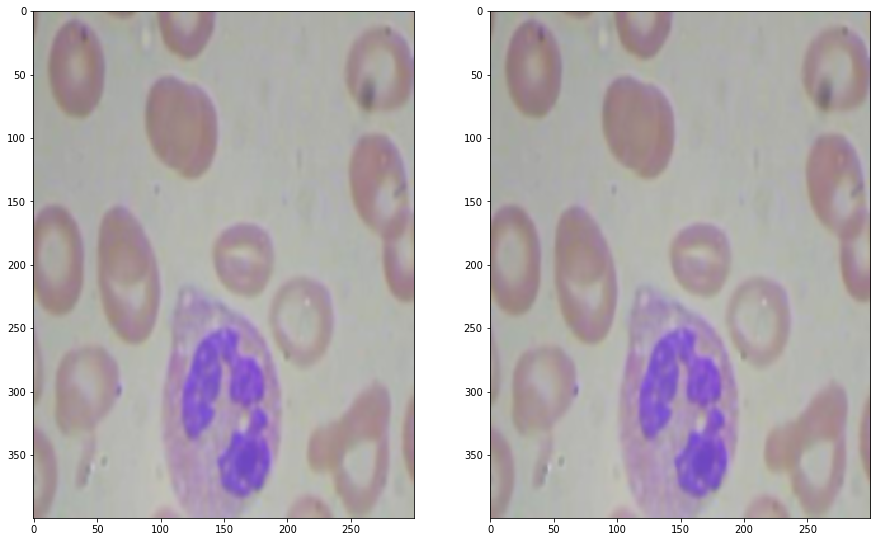

In [11]:
gausblur = cv2.GaussianBlur(resized,(5,5),0)
biblur = cv2.bilateralFilter(resized,4,60,60)

fig=plt.figure(figsize=(15,15))
axes=fig.subplots(1,2)

axes[0].imshow(gausblur)
axes[1].imshow(biblur)

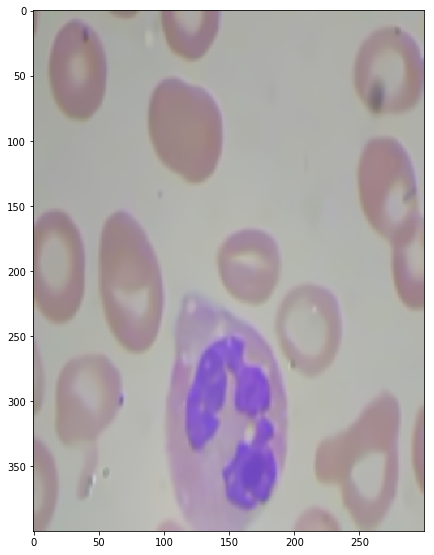

In [12]:
fastb= cv2.fastNlMeansDenoising(resized,5,5,7,21)

plt.figure(figsize=(7,12))
plt.imshow(fastb)

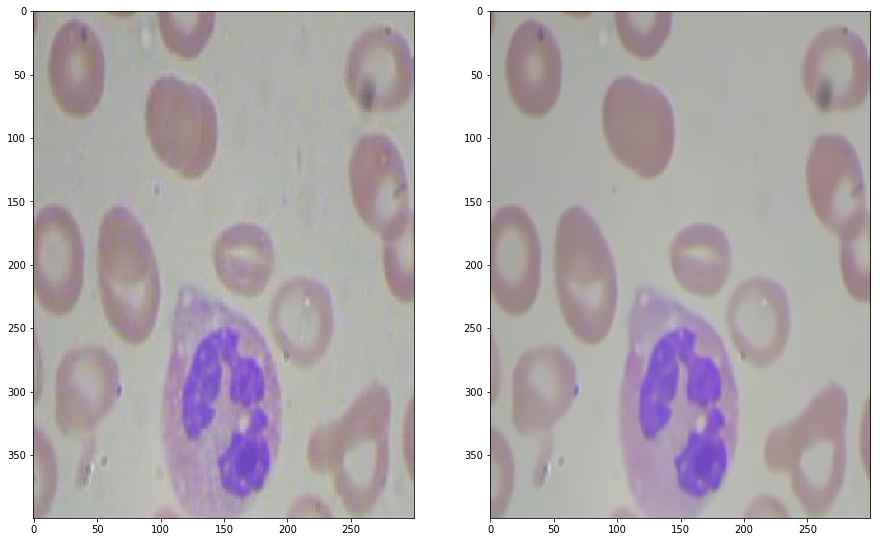

In [13]:
#sharpening image
#sharpf = np.array([[-1,-1,-1],[-1,9,-1],-1,-1,-1]])

sharpf = np.array([[0,-0.15,0],
                  [-0.15,1.6,-0.15],
                  [0,-0.15,0]])


sharp1= cv2.filter2D(resized,-1,sharpf)
sharp2= cv2.filter2D(fastb,-1,sharpf)


fig=plt.figure(figsize=(15,15))
axes=fig.subplots(1,2)

axes[0].imshow(sharp1)
axes[1].imshow(sharp2)

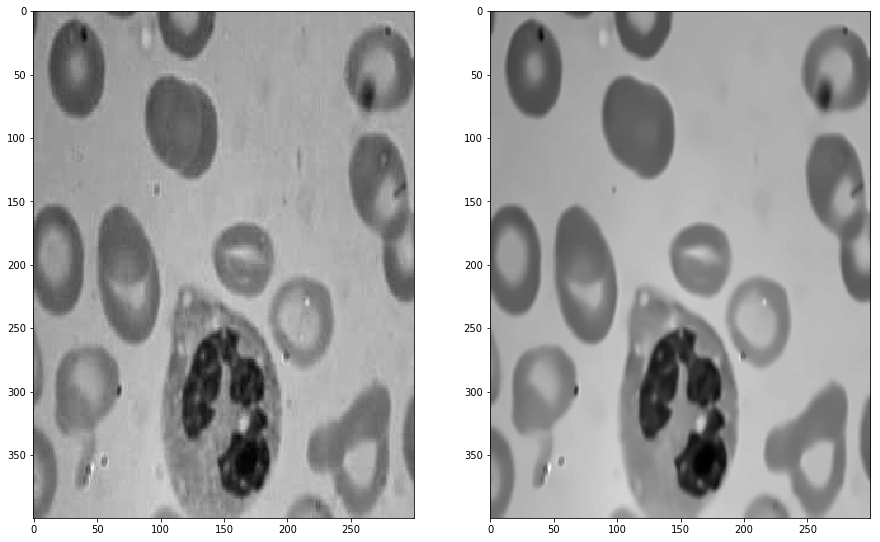

In [14]:
fig=plt.figure(figsize=(15,15))
axes=fig.subplots(1,2)

sharpg1= cv2.cvtColor(sharp1,cv2.COLOR_RGB2GRAY)
sharpg2= cv2.cvtColor(sharp2,cv2.COLOR_RGB2GRAY)

axes[0].imshow(sharpg1,cmap='gray')
axes[1].imshow(sharpg2,cmap='gray')

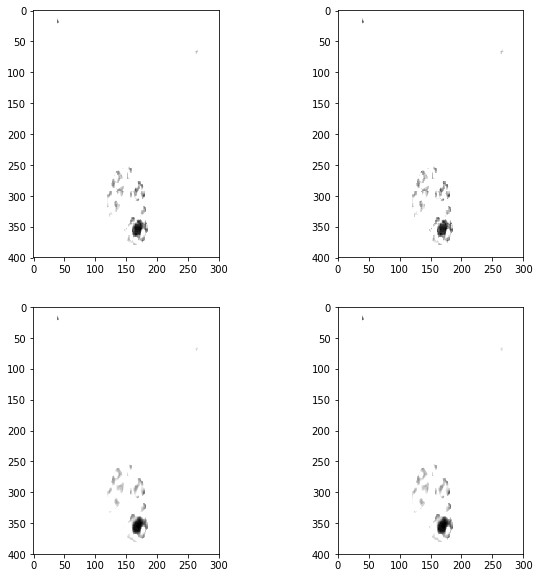

In [15]:
#thersholding
resgray= cv2.cvtColor(resized,cv2.COLOR_RGB2GRAY)
fastbgray= cv2.cvtColor(fastb.copy(),cv2.COLOR_RGB2GRAY)

ret,wbcorgth= cv2.threshold(resgray,115, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_TRUNC)
ret,wbcsharpth1= cv2.threshold(sharpg1,115,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_TRUNC)
ret,wbcfastbth= cv2.threshold(fastbgray,115,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_TRUNC)
ret,wbcsharpth2= cv2.threshold(sharpg2,115,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_TRUNC)

fig=plt.figure(figsize=(10,10))
axes=fig.subplots(2,2)

axes[0][0].imshow(wbcorgth,cmap='gray')
axes[0][1].imshow(wbcsharpth1,cmap='gray')
axes[1][0].imshow(wbcfastbth,cmap='gray')
axes[1][1].imshow(wbcsharpth2,cmap='gray')

wbc=wbcfastbth.copy()

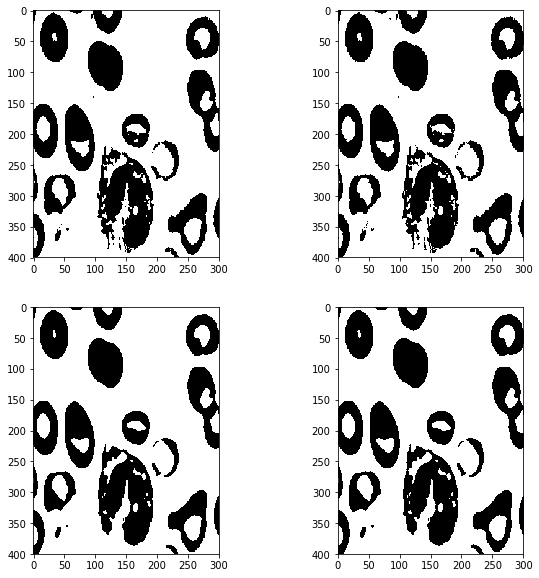

In [16]:
#thersholding
resgray= cv2.cvtColor(resized,cv2.COLOR_RGB2GRAY)
fastbgray= cv2.cvtColor(fastb.copy(),cv2.COLOR_RGB2GRAY)

ret,orgth= cv2.threshold(resgray,120,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret,sharpth1= cv2.threshold(sharpg1,120,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret,fastbth= cv2.threshold(fastbgray,120,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret,sharpth2= cv2.threshold(sharpg2,120,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

fig=plt.figure(figsize=(10,10))
axes=fig.subplots(2,2)

axes[0][0].imshow(orgth,cmap='gray')
axes[0][1].imshow(sharpth1,cmap='gray')
axes[1][0].imshow(fastbth,cmap='gray')
axes[1][1].imshow(sharpth2,cmap='gray')

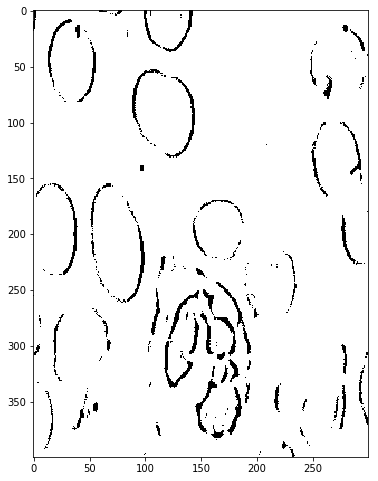

In [17]:
adp= cv2.adaptiveThreshold(fastbgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,9,3)

plt.figure(figsize=(6,10))
plt.imshow(adp,cmap="gray")

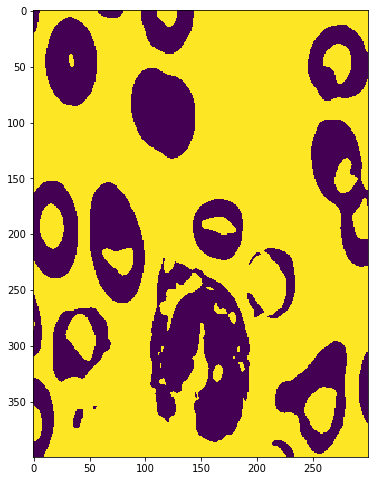

In [18]:
plt.figure(figsize=(6,10))
plt.imshow(fastbth)

In [19]:
#outline (like edge detection)

# edgf = np.array([[-1,-1,-1],
#                   [-1,8,-1],
#                   [-1,-1,-1]])


def filterededgeDec(fastbgray):
    # vertical left edge detector
    edgf = np.array([[1,0,-1],
                      [2,0,-2],    
                      [1,0,-1]])
    edgDec1= cv2.filter2D(fastbgray,-1,edgf)



    #vertical left edge detector
    edgf = np.array([[-1,0,1],
                      [-2,0,2],    
                      [-1,0,1]])
    edgDec2= cv2.filter2D(fastbgray,-1,edgf)



    #horizontal bottom edge detector
    edgf = np.array([[-1,-2,-1],
                      [0,0,0],    
                      [1,2,1]])
    edgDec3= cv2.filter2D(fastbgray,-1,edgf)



    #horizontal top edge detector
    edgf = np.array([[1,2,1],
                      [0,0,0],    
                      [-1,-2,-1]])
    edgDec4= cv2.filter2D(fastbgray,-1,edgf)




    fig=plt.figure(figsize=(10,10))
    axes=fig.subplots(2,2)

    axes[0][0].imshow(edgDec1,cmap='gray')
    axes[0][1].imshow(edgDec2,cmap='gray')
    axes[1][0].imshow(edgDec3,cmap='gray')
    axes[1][1].imshow(edgDec4,cmap='gray')
    
    filtrededgedec = cv2.add(edgDec1,edgDec2)
    filtrededgedec = cv2.add(filtrededgedec,edgDec3)
    filtrededgedec = cv2.add(filtrededgedec,edgDec4)

    return filtrededgedec

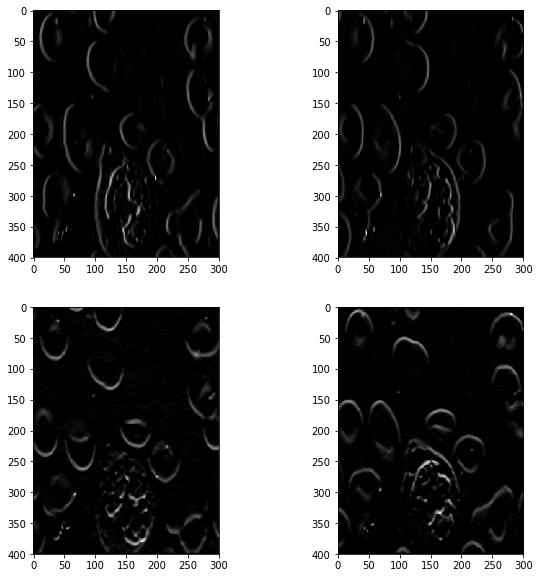

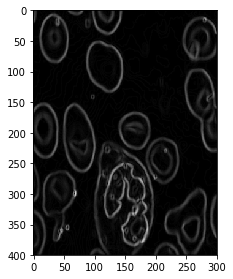

In [20]:
filtrededgedec =  filterededgeDec(fastbgray)
plt.figure(figsize=(4.5,4.5))
plt.imshow(filtrededgedec,cmap="gray")

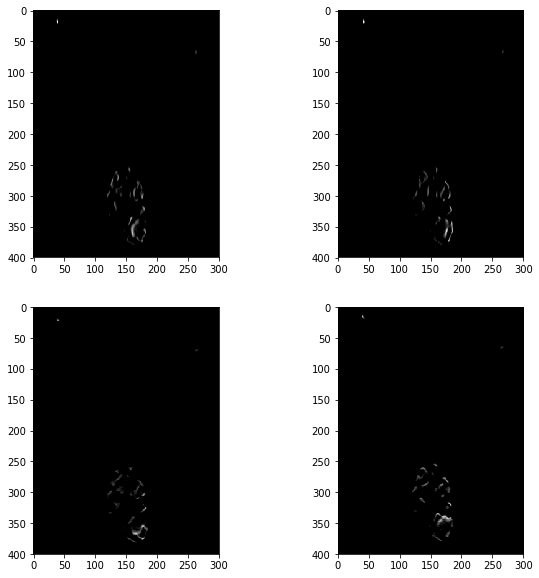

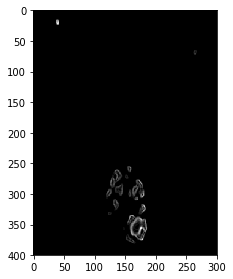

In [21]:
wbcedge =  filterededgeDec(wbc)
plt.figure(figsize=(4.5,4.5))
plt.imshow(wbcedge,cmap="gray")

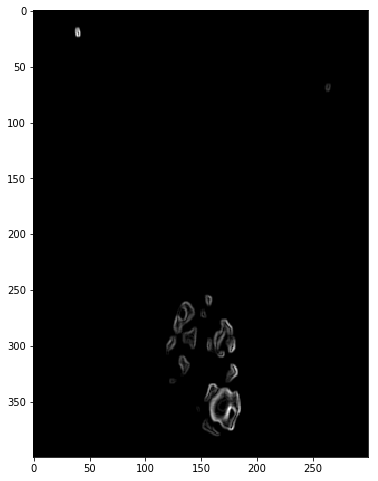

In [22]:
ret,wbcedgeth= cv2.threshold(wbcedge,150,255, cv2.THRESH_TRUNC )

plt.figure(figsize=(6,10))
plt.imshow(wbcedgeth,cmap="gray")

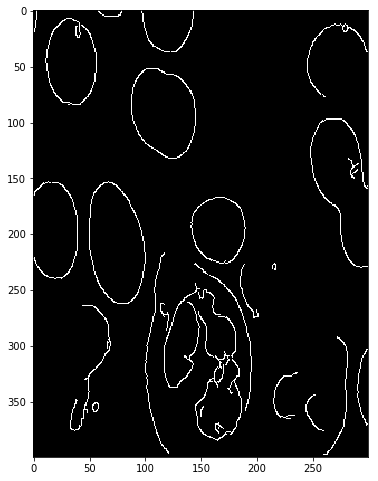

In [23]:
# sobel edge detection
# sobeled= cv2.Sobel(fastbgray,cv2.CV_32F,1,1,ksize=5)
# plt.figure(figsize=(6,10))
# plt.imshow(sobeled,cmap="gray")

# laplacian edge detection
# sobeled= cv2.Laplacian(fastbgray,cv2.CV_32F)
# plt.figure(figsize=(6,10))
# plt.imshow(sobeled,cmap="gray")

# Canny edge detection
#cannyed= cv2.Canny(filtrededgedec,190,255)
cannyed= cv2.Canny(fastbgray,30,85)
plt.figure(figsize=(6,10))
plt.imshow(cannyed,cmap="gray")

In [24]:
#Grayscale img is needed to find contours
#Need to create copy as findcontours() make changes in src img provided
#Invert the input image - so that image border is not detected by findcontours
contourimg= 255 - fastbth.copy() 
#contourimg= erode.copy() 
#contourimg= cannyed.copy() 

# plt.figure(figsize=(6,10))
# plt.imshow(contourimg,cmap='gray')

contours, hierarchy = cv2.findContours(contourimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# plt.figure(figsize=(6,10))
# plt.imshow(contourimg,cmap='gray')

print("No. of contours found : "+ str(len(contours)))

No. of contours found : 23


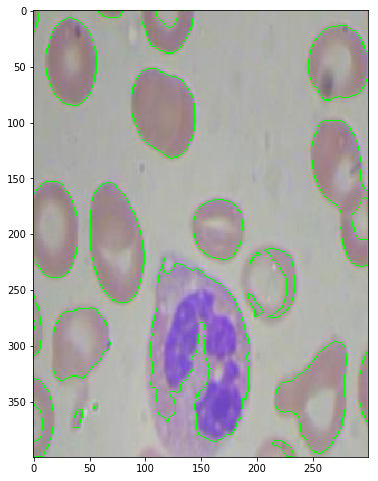

In [25]:
contouronimg = resized.copy()
cv2.drawContours(contouronimg,contours,-1,(0,255,0),1)
plt.figure(figsize=(6,10))
plt.imshow(contouronimg,cmap='gray')

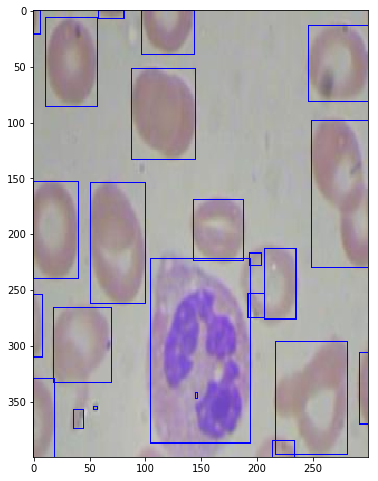

In [26]:
#drawing rectangle-- polygon around image 
rectangleimg = resized.copy()

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(rectangleimg, (x,y), (x+w ,y+h), (0,0,255) , 1)
    
plt.figure(figsize=(6,10))
plt.imshow(rectangleimg)

# for c in contours:
#     acc= 0.01 * cv2.arcLength(c,True)
#     approx= cv2.approxPolyDP(c,acc,True)
#     cv2.drawContours(rectangleimg, [approx], 0, (0,255,0) , 1)
    
# plt.figure(figsize=(6,10))
# plt.imshow(rectangleimg)

No. of contours found : 3


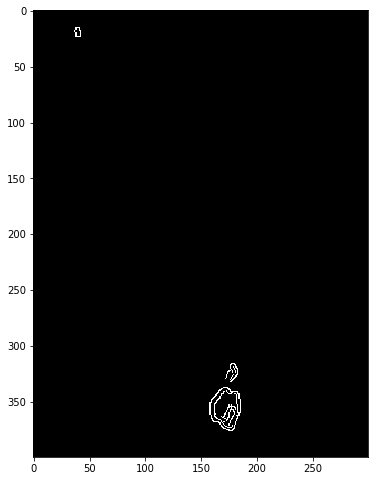

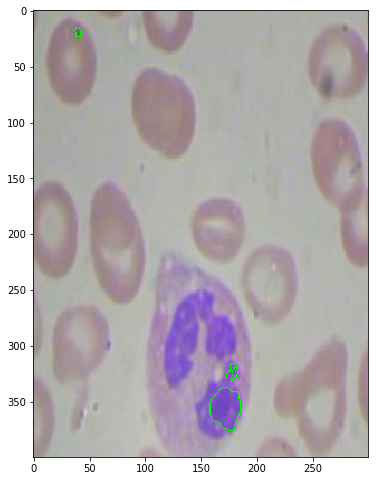

In [27]:
# plt.figure(figsize=(6,10))
# plt.imshow(wbc)

# Canny edge detection
wbccannyed= cv2.Canny(wbcedgeth,45,255)
plt.figure(figsize=(6,10))
plt.imshow(wbccannyed,cmap="gray")


wbccontourimg= wbccannyed.copy() 

wbccontours, hierarchy = cv2.findContours(wbccontourimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#plt.figure(figsize=(6,10))
#plt.imshow(wbccontourimg,cmap='gray')

print("No. of contours found : "+ str(len(wbccontours)))


wbccontouronimg = resized.copy()
cv2.drawContours(wbccontouronimg,wbccontours,-1,(0,255,0),1)
plt.figure(figsize=(6,10))
plt.imshow(wbccontouronimg,cmap='gray')

In [28]:
wbcpoints=[]
l=len(wbccontours)
count=0

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    for wc in wbccontours:
        wx,wy,ww,wh = cv2.boundingRect(wc)
        if x<=wx  and   y<=wy and   x+w >= wx+ww  and   y+h >= wh+wy :
            if [x,y,w,h] not in wbcpoints:
                wbcpoints.append([x,y,w,h])
        

print(wbcpoints)

[[105, 222, 89, 165], [11, 6, 46, 80]]


11 6 46 80


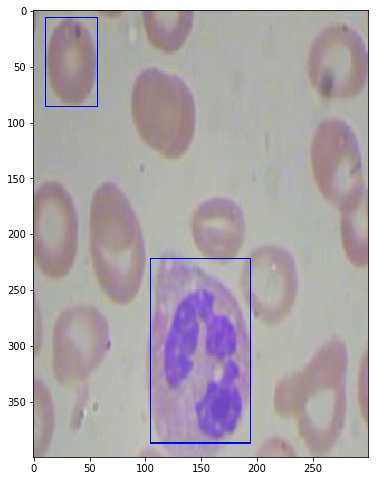

In [29]:
wbcrectangleimg = resized.copy()

for c in wbcpoints:
    a,b,c,d = c
    cv2.rectangle(wbcrectangleimg, (a,b), (a+c ,b+d), (0,0,255) , 1)
    
plt.figure(figsize=(6,10))
plt.imshow(wbcrectangleimg)
print(a,b,c,d)

In [30]:
#use area of wbc contour to remove false areas ----- should be greater than min


In [31]:
image_blur_hsv = cv2.cvtColor(fastb, cv2.COLOR_RGB2HSV)
#plt.figure(figsize=(6,10))
#plt.imshow(image_blur_hsv)

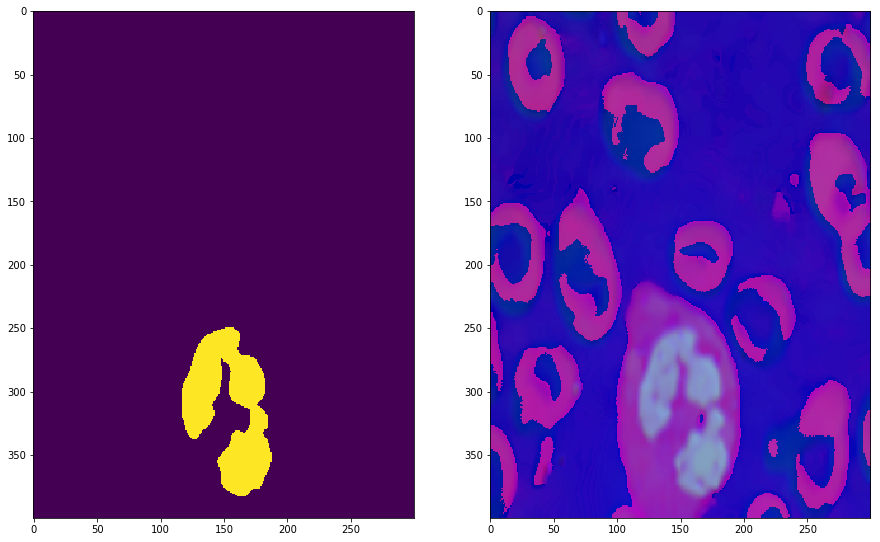

In [32]:
min_red = np.array([90, 85, 140])
max_red = np.array([255, 255, 255])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)


fig=plt.figure(figsize=(15,15))
ax = fig.subplots(1,2)

ax[0].imshow(image_red1)
ax[1].imshow(image_blur_hsv)

No. of contours found : 1


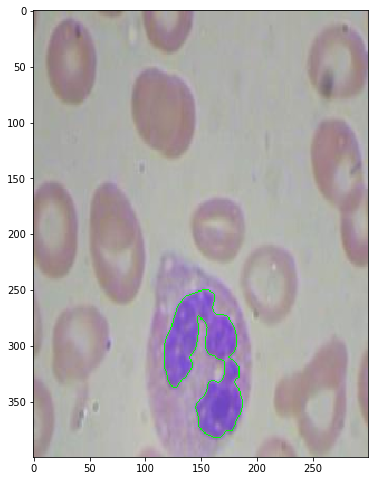

In [33]:
wbcimage_blur_hsv= image_red1.copy() 

wbccontours1, hierarchy1 = cv2.findContours(wbcimage_blur_hsv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#plt.figure(figsize=(6,10))
#plt.imshow(wbccontourimg,cmap='gray')

print("No. of contours found : "+ str(len(wbccontours1)))


wbccontouronimg1 = resized.copy()
cv2.drawContours(wbccontouronimg1,wbccontours1,-1,(0,255,0),1)
plt.figure(figsize=(6,10))

plt.imshow(wbccontouronimg1,cmap='gray')

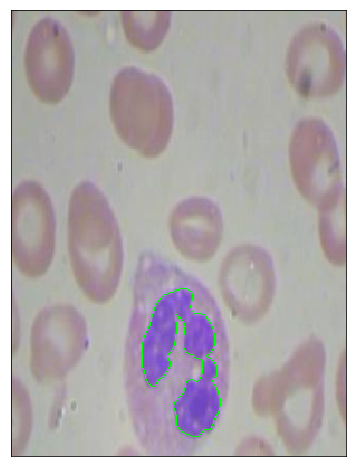

In [34]:
wbccontouronimg1 = resized.copy()
cv2.drawContours(wbccontouronimg1,wbccontours1,-1,(0,255,0),1)
plt.figure(figsize=(6,10))
plt.xticks([]), plt.yticks([])
plt.imshow(wbccontouronimg1,cmap='gray')

plt.savefig('out.jpg', bbox_inches='tight', pad_inches=0)

wbcimage_blur_hsv= image_red1.copy() 

wbccontours1, hierarchy1 = cv2.findContours(wbcimage_blur_hsv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#plt.figure(figsize=(6,10))
#plt.imshow(wbccontourimg,cmap='gray')

print("No. of contours found : "+ str(len(wbccontours1)))


wbccontouronimg1 = resized.copy()
cv2.drawContours(wbccontouronimg1,wbccontours1,-1,(0,255,0),1)
plt.figure(figsize=(6,10))
plt.imshow(wbccontouronimg1,cmap='gray')